In [79]:
!pip install numpy pandas matplotlib seaborn

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [81]:
!pip install sklearn

In [82]:
df = pd.read_csv('StudentsPerformance.csv')

In [83]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# PreProcessing

In [84]:
pd.set_option('display.max_rows', None) #USING https://songhuiming.github.io/pages/2017/04/02/jupyter-and-pandas-display/#:~:text=To%20show%20the%20full%20data,'%2C%20500
df = df.drop("lunch", axis=1)
df = df.drop("race/ethnicity", axis=1)
df

,gender,parental level of education,test preparation course,math score,reading score,writing score
0,female,bachelor's degree,none,72,72,74
1,female,some college,completed,69,90,88
2,female,master's degree,none,90,95,93
3,male,associate's degree,none,47,57,44
4,male,some college,none,76,78,75
5,female,associate's degree,none,71,83,78
6,female,some college,completed,88,95,92
7,male,some college,none,40,43,39
8,male,high school,completed,64,64,67
9,female,high school,none,38,60,50


In [85]:
df.shape

(1000, 6)

In [86]:
df.columns

Index(['gender', 'parental level of education', 'test preparation course',
       'math score', 'reading score', 'writing score'],
      dtype='object')

In [87]:
df.isna().sum()

gender                         0
parental level of education    0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

# DataAnalysis

## Gender

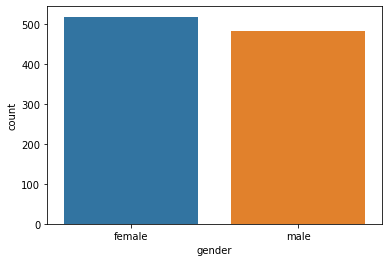

In [90]:
ax = sns.countplot(x="gender", data=df)

In [91]:
df['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

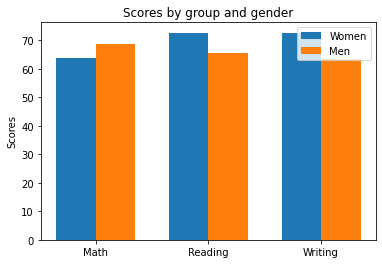

In [92]:
#seperate male and female. can be done in other methods.
women = df[df['gender'] == "female"]
men = df[df['gender'] == 'male']

# create labels for x axis
labels = ["Math", "Reading", "Writing"]

#find the means of the different features for each gender
m_means = [men["math score"].mean(), men["reading score"].mean(), men["writing score"].mean()]
w_means = [women["math score"].mean(),women["reading score"].mean(),women["writing score"].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#create charts
fig, ax = plt.subplots()
plt.bar(x - width/2, w_means, width, label='Women')
plt.bar(x + width/2, m_means, width, label='Men')

ax.set_ylabel('Scores') #Whatever you may want your y-label to be
ax.set_title('Scores by group and gender') #overall chart title
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend() 
plt.show()

## Parental level of education

[Text(0, 0, "bachelor's degree"),
 Text(1, 0, 'some college'),
 Text(2, 0, "master's degree"),
 Text(3, 0, "associate's degree"),
 Text(4, 0, 'high school'),
 Text(5, 0, 'some high school')]

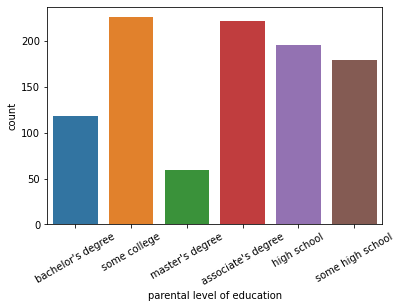

In [93]:
ax = sns.countplot(x="parental level of education", data=df)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 30) #USING https://www.delftstack.com/howto/seaborn/rotate-tick-labels-seaborn/

<AxesSubplot:ylabel='parental level of education'>

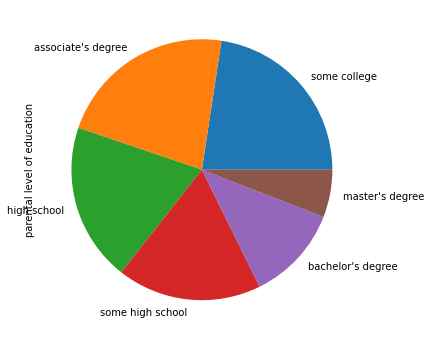

In [96]:
df["parental level of education"].value_counts().plot.pie(y="parental level of education", figsize=(11,6))

In [97]:
df['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

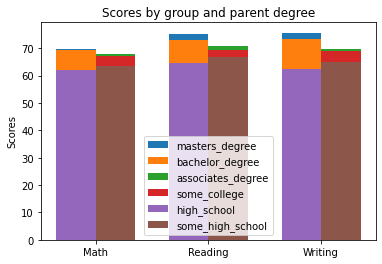

In [98]:
#seperate completed and incompleted. can be done in other methods.
bachelor_degree = df[df['parental level of education'] == "bachelor's degree"]
some_college = df[df['parental level of education'] == 'some college']
masters_degree = df[df['parental level of education'] == "master's degree"]
associates_degree = df[df['parental level of education'] == "associate's degree"]
high_school = df[df['parental level of education'] == 'high school']
some_high_school = df[df['parental level of education'] == 'some high school']

# create labels for x axis
labels = ["Math", "Reading", "Writing"]

#find the means of the different features for each gender
bachelor_degree = [bachelor_degree["math score"].mean(), bachelor_degree["reading score"].mean(), bachelor_degree["writing score"].mean()]
some_college = [some_college["math score"].mean(),some_college["reading score"].mean(),some_college["writing score"].mean()]
masters_degree = [masters_degree["math score"].mean(), masters_degree["reading score"].mean(), masters_degree["writing score"].mean()]
associates_degree = [associates_degree["math score"].mean(),associates_degree["reading score"].mean(),associates_degree["writing score"].mean()]
high_school = [high_school["math score"].mean(), high_school["reading score"].mean(), high_school["writing score"].mean()]
some_high_school = [some_high_school["math score"].mean(),some_high_school["reading score"].mean(),some_high_school["writing score"].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#create charts
fig, ax = plt.subplots()

plt.bar(x - width/2, masters_degree, width, label='masters_degree')
plt.bar(x - width/2, bachelor_degree, width, label='bachelor_degree')
plt.bar(x + width/2, associates_degree, width, label='associates_degree')
plt.bar(x + width/2, some_college, width, label='some_college')
plt.bar(x - width/2, high_school, width, label='high_school')
plt.bar(x + width/2, some_high_school, width, label='some_high_school')

ax.set_ylabel('Scores') #Whatever you may want your y-label to be
ax.set_title('Scores by group and parent degree') #overall chart title
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend() 
plt.show()

## Test preparation

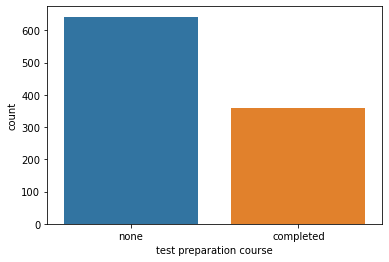

In [99]:
ax = sns.countplot(x="test preparation course", data=df)


<AxesSubplot:ylabel='test preparation course'>

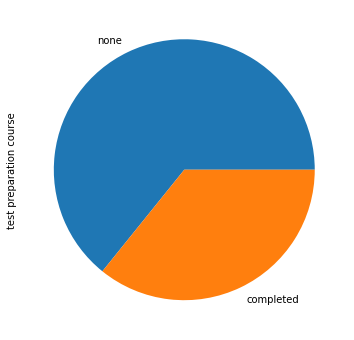

In [100]:
df["test preparation course"].value_counts().plot.pie(y="test preparation course", figsize=(11,6))
#USING https://github.com/nosaka0/vehicular-accident-analysis/blob/main/viz.ipynb

In [101]:
df['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

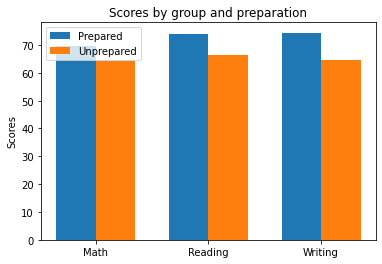

In [102]:
#seperate male and female. can be done in other methods.
prepared = df[df['test preparation course'] == "completed"]
unprepared = df[df['test preparation course'] == 'none']

# create labels for x axis
labels = ["Math", "Reading", "Writing"]

#find the means of the different features for each gender
prepared_means = [prepared["math score"].mean(), prepared["reading score"].mean(), prepared["writing score"].mean()]
unprepared_means = [unprepared["math score"].mean(),unprepared["reading score"].mean(),unprepared["writing score"].mean()]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#create charts
fig, ax = plt.subplots()
plt.bar(x - width/2, prepared_means, width, label='Prepared')
plt.bar(x + width/2, unprepared_means, width, label='Unprepared')

ax.set_ylabel('Scores') #Whatever you may want your y-label to be
ax.set_title('Scores by group and preparation') #overall chart title
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend() 
plt.show()